# Histogram Equalisation

In [1]:
# import cv and pyplot
import cv2
from matplotlib import pyplot as plt

In [2]:
# 1. Read Image
# 2. Convert to Gray scale, and plot Histogram
# 3. Perform Histogram Equalization and plot Histogram
# 4. Perform Adaptive Histogram Equalization and plot Histogram

def process(i):
    # Read image
    img = cv2.imread(f'image{i}.jpg')

    # To Gray Scale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.axis("off")
    plt.title(f'image - {i} - Grayscale')
    cv2.imwrite(f'image{i}-gray.jpg', img)
    plt.figure()
    plt.hist(img.flatten(),256,(0,256))
    plt.title(f'image - {i} - Histogram')

    # Histogram Equalisation
    hist_eq = cv2.equalizeHist(img)
    plt.figure()
    plt.imshow(hist_eq, cmap='gray')
    plt.axis("off")
    plt.title(f'image{i} - Histogram Equalized')
    cv2.imwrite(f'image{i}-he.jpg', hist_eq)
    plt.figure()
    plt.hist(hist_eq.flatten(),256,(0,256))
    plt.title(f'image - {i} - Equlaized Histogram')

    # Adaptive Histogram Equalisation
    adap_hist_eq = cv2.createCLAHE(clipLimit=5).apply(img)
    plt.figure()
    plt.imshow(adap_hist_eq, cmap='gray')
    cv2.imwrite(f'image{i}-ahe.jpg', adap_hist_eq)
    plt.axis("off")
    plt.title(f'image - Histogram Adaptive Equalized')
    plt.figure()
    plt.hist(adap_hist_eq.flatten(),256,(0,256))
    plt.title(f'image - {i} - Adaptive Equalized Histogram')
    return (hist_eq, adap_hist_eq)


# 5. Thresholding the output of Equalised images
def thresh(eq_img, eq_thresh, adap_eq_img, adap_eq_thresh, i):
    _, hist_eq_thresh = cv2.threshold(eq_img, eq_thresh, 255, cv2.THRESH_BINARY)
    plt.figure()
    plt.imshow(hist_eq_thresh, cmap='gray')
    plt.axis("off")
    plt.title(f'image - Histogram Equalized Thresholded')
    cv2.imwrite(f'image{i}-he_th.jpg', hist_eq_thresh)

    _, adap_hist_eq_thresh = cv2.threshold(adap_eq_img, adap_eq_thresh, 255, cv2.THRESH_BINARY)
    plt.figure()
    plt.imshow(adap_hist_eq_thresh, cmap='gray')
    plt.axis("off")
    plt.title(f'image - Adaptive Histogram Equalized Thresholded')
    cv2.imwrite(f'image{i}-ahe_th.jpg', adap_hist_eq_thresh)
    


## Dim Illuminated Image

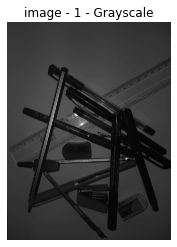

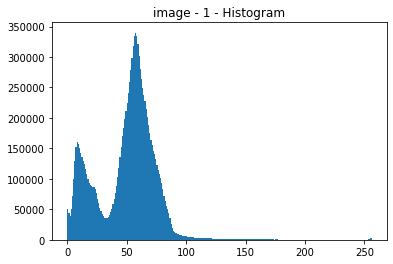

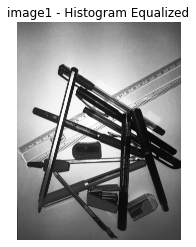

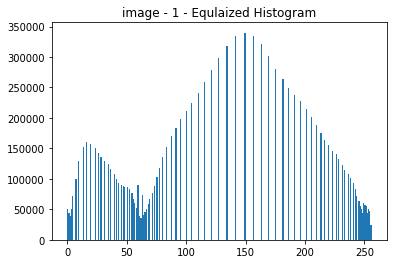

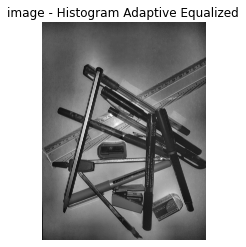

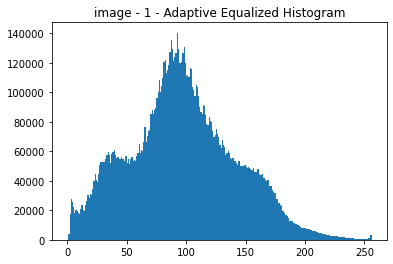

In [3]:
# Dim Illumination:
eq_img_1, adap_eq_img_1 = process(1)

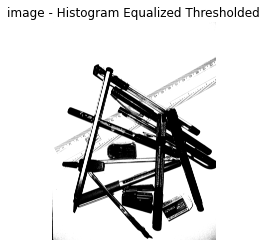

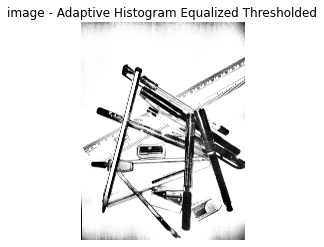

In [10]:
thresh(eq_img_1, 60, adap_eq_img_1, 50, 1)

## Optimum Illuminated Image

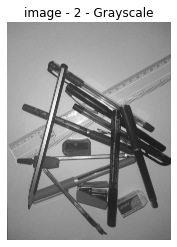

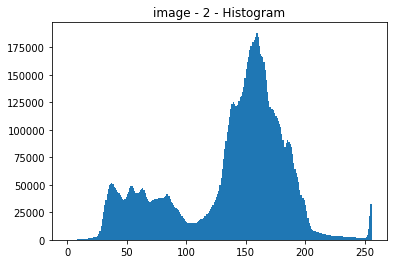

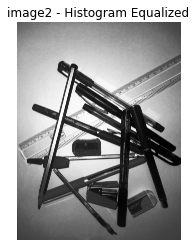

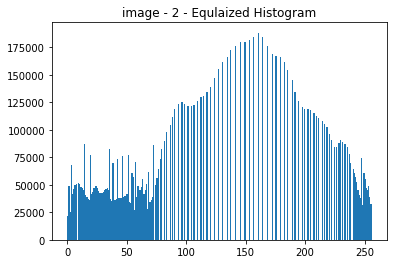

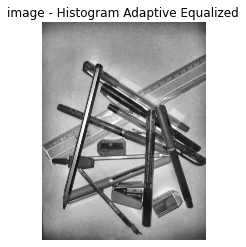

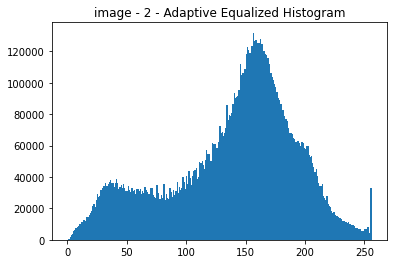

In [5]:
# Optimum Illumination
eq_img_2, adap_eq_img_2 = process(2)

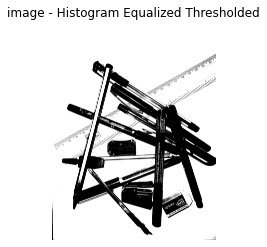

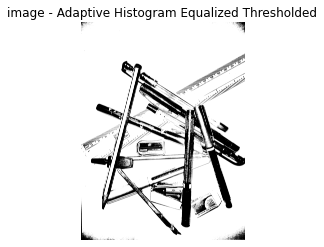

In [6]:
thresh(eq_img_2, 60, adap_eq_img_2, 75, 2)

## Excess Illuminated Image

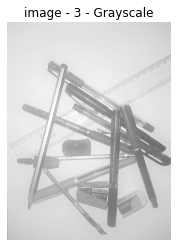

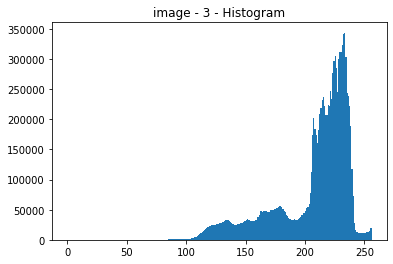

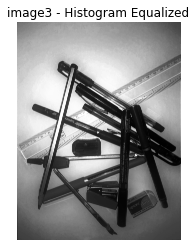

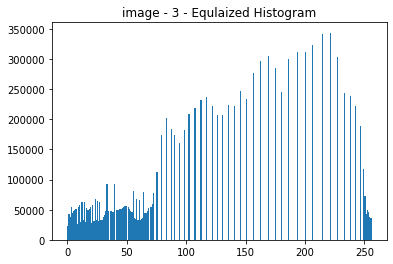

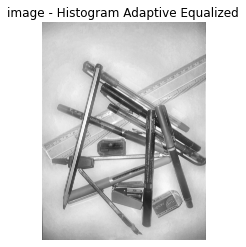

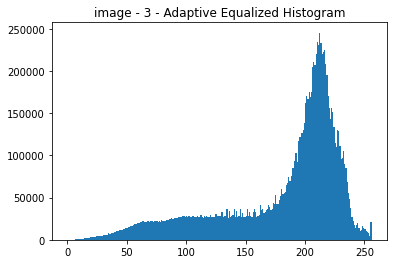

In [7]:
# Excess Illumination
eq_img_3, adap_eq_img_3 = process(3)

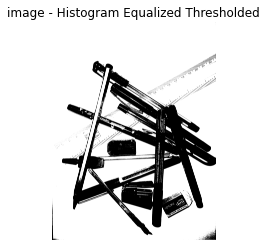

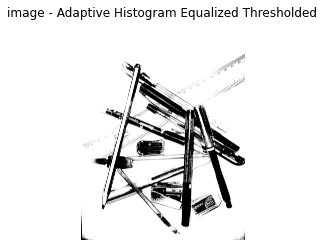

In [8]:
thresh(eq_img_3, 60, adap_eq_img_3, 120, 3)